In [314]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [315]:
dataset=pd.read_csv("EMG-data.csv") 
print(dataset.head())
print(dataset.shape)


   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7   
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000  \
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


In [316]:
print("\nempty values:",dataset.isnull().any().sum()) 


empty values: 0


In [317]:
dataset=dataset.drop(columns=["time"])
Class = dataset["class"]
print(Class.unique())
print("Value Count :\n", dataset["class"].value_counts())

[0 1 2 3 4 5 6 7]
Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [318]:
##drop gesture 0 because it offers no information due to its unmarked nature
index_numbers_1=dataset[dataset["class"]==0].index 
dataset.drop(index_numbers_1,inplace=True)
##drop gesture 7 because it offers no information due to it being performed 
##by just two out of 36 patients 
index_numbers_2=dataset[dataset["class"]==7].index
dataset.drop(index_numbers_2,inplace=True)

In [319]:
dataset=dataset.groupby(['label','class'])

In [320]:
##functions for extracting sEMG features
def rms(data): ##root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def SSI(data): ##Simple Square Integral
    return np.sum(data**2,axis=0)

def abs_diffs_signal(data): ##absolute differential signal
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)

##function for returning an estimator class name 
def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [321]:
##tabulating the aggregated sEMG features
dataset=dataset.agg(['min','max',rms,SSI,abs_diffs_signal,np.ptp])

In [322]:
dataset=dataset.reset_index()
dataset.head()

label class channel1                                                          
                   min      max       rms       SSI abs_diffs_signal      ptp   
0     1     1 -0.00005  0.00004  0.000017  0.000002          0.01070  0.00009  \
1     1     2 -0.00111  0.00095  0.000210  0.000301          0.16819  0.00206   
2     1     3 -0.00087  0.00112  0.000188  0.000260          0.14544  0.00199   
3     1     4 -0.00020  0.00016  0.000056  0.000022          0.03609  0.00036   
4     1     5 -0.00031  0.00061  0.000066  0.000030          0.04939  0.00092   

  channel2           ...  channel7                                       
       min      max  ...       rms       SSI abs_diffs_signal      ptp   
0 -0.00010  0.00007  ...  0.000013  0.000001          0.00870  0.00006  \
1 -0.00047  0.00041  ...  0.000216  0.000318          0.16251  0.00153   
2 -0.00113  0.00127  ...  0.000078  0.000044          0.05866  0.00063   
3 -0.00038  0.00024  ...  0.000118  0.000095          0.07517  0.00090   
4 -0.00066  0.00035  ...  0.000084  0.000049          0.06768  0.00055   

  channel8                                                         
       min      max       rms       SSI abs_diffs_signal      ptp  
0 -0.00005  0.00002  0.000014  0.000001          0.00921  0.00007  
1 -0.00070  0.00054  0.000150  0.000153          0.11696  0.00124  
2 -0.00073  0.00051  0.000161  0.000190          0.11869  0.00124  
3 -0.00032  0.00026  0.000083  0.000047          0.04984  0.00058  
4 -0.00030  0.00045  0.000060  0.000025          0.04606  0.00075  

[5 rows x 50 columns]

In [323]:
temp2=dataset

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [325]:
estimators=[]
accuracy=[]
f1_macro=[]

In [326]:
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]

C:\Users\moham\AppData\Local\Temp\ipykernel_3520\1506687212.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


In [327]:
##Training and testing set splitting
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)

In [328]:
## Data normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [329]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (151, 48)
x_test shape (65, 48)
y_train shape (151,)
y_test shape (65,)


In [330]:
y_train = y_train -1
y_test = y_test  - 1

In [331]:
trainingtarget = y_train
testtarget  = y_test

In [332]:
trainingtarget

14     2
138    0
122    2
56     2
185    5
      ..
203    5
137    5
72     0
140    2
37     1
Name: class, Length: 151, dtype: int64

In [333]:
from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoded format
trainLabels  = to_categorical(trainingtarget)
testLabels   = to_categorical(testtarget)

In [334]:
trainLabels

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0.

In [335]:
testLabels.shape

(65, 6)

In [336]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

model = Sequential([
    layers.Dense(1024, input_shape=(48,), activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(6, activation='softmax')
])


In [337]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="loss",patience=3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 1024)              50176     
                                                                 
 dense_168 (Dense)           (None, 512)               524800    
                                                                 
 dense_169 (Dense)           (None, 256)               131328    
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_170 (Dense)           (None, 128)               32896     
                                                                 
 dense_171 (Dense)           (None, 64)                8256      
                                                                 
 dropout_47 (Dropout)        (None, 64)              

In [338]:
print(X_train.shape)


(151, 48)


In [339]:
batch_size = 512            
epochs = 200            

history = model.fit(X_train,trainLabels,
                    batch_size=batch_size,
                    epochs = epochs,
                    validation_split = 0.3,
                    callbacks=[early_stopping]
                     )

model.summary()

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.7922 - accuracy: 0.2000 - val_loss: 1.7510 - val_accuracy: 0.2391
Epoch 2/200
1/1 [==============================] - 0s 71ms/step - loss: 1.7209 - accuracy: 0.2952 - val_loss: 1.6775 - val_accuracy: 0.1957
Epoch 3/200
1/1 [==============================] - 0s 67ms/step - loss: 1.6172 - accuracy: 0.3429 - val_loss: 1.5829 - val_accuracy: 0.2174
Epoch 4/200
1/1 [==============================] - 0s 67ms/step - loss: 1.5246 - accuracy: 0.3143 - val_loss: 1.4787 - val_accuracy: 0.3913
Epoch 5/200
1/1 [==============================] - 0s 65ms/step - loss: 1.4046 - accuracy: 0.4857 - val_loss: 1.4145 - val_accuracy: 0.5435
Epoch 6/200
1/1 [==============================] - 0s 68ms/step - loss: 1.2770 - accuracy: 0.4857 - val_loss: 1.3551 - val_accuracy: 0.5435
Epoch 7/200
1/1 [==============================] - 0s 64ms/step - loss: 1.1865 - accuracy: 0.6762 - val_loss: 1.2949 - val_accuracy: 0.6087
Epoch 8/200
1/1 [=====

In [340]:
evaluation = model.evaluate(X_test,  testLabels,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

1/1 - 0s - loss: 1.3311 - accuracy: 0.8308 - 40ms/epoch - 40ms/step

Test loss : 133.1131100654602 %
Test accuracy : 83.07692408561707 %


In [341]:
y_pred=model.predict(X_test)
print(y_pred)
# print(y_test)

3/3 [==============================] - 0s 3ms/step
[[9.97202277e-01 6.22632069e-05 8.33580707e-05 2.56797415e-03
  2.17098586e-05 6.25120811e-05]
 [4.56975686e-04 2.78348406e-03 5.35360368e-06 9.72820163e-01
  3.65909480e-04 2.35680044e-02]
 [1.34928224e-09 9.76076109e-10 2.18797344e-04 7.09482606e-07
  9.99780357e-01 6.66765132e-08]
 [4.24177832e-10 7.14580617e-11 1.20837040e-05 1.74200554e-09
  5.89292018e-11 9.99987960e-01]
 [1.19982706e-02 5.72980046e-01 2.56340355e-01 9.83008444e-02
  3.66085432e-02 2.37719640e-02]
 [6.29366785e-02 3.05527627e-01 8.57379884e-02 1.18549973e-01
  3.97937465e-03 4.23268288e-01]
 [1.86826856e-11 1.31304356e-10 2.76708815e-05 3.36826673e-07
  9.99971986e-01 1.91087359e-08]
 [2.27965824e-08 9.99881387e-01 1.30252303e-07 1.18421180e-04
  2.51687018e-13 9.86638860e-09]
 [9.98570800e-01 2.76286573e-05 4.40507501e-05 1.31452747e-03
  6.80306221e-06 3.61779785e-05]
 [7.41658255e-08 5.19600292e-07 2.30882055e-04 4.53169108e-04
  9.99307156e-01 8.20110654e-06]

In [342]:
# Prediction & confusion matrix - test data
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
print(y_pred)

3/3 [==============================] - 0s 3ms/step
[0 3 4 5 0 1 4 1 0 4 4 1 0 0 3 1 4 5 5 3 4 3 5 5 3 0 5 3 2 3 1 0 2 2 1 5 0
 3 1 3 0 4 0 3 3 5 3 5 4 1 2 4 5 0 5 0 3 0 0 3 5 4 4 5 1]


In [343]:
print(testtarget.unique())

[0 3 4 2 1 5]


In [344]:
table1 = confusion_matrix(testtarget,y_pred)
print(table1)

[[11  0  0  0  0  0]
 [ 1  6  0  0  1  0]
 [ 1  1  2  0  0  4]
 [ 0  0  0 12  0  0]
 [ 1  0  0  2 10  0]
 [ 0  2  2  0  0  9]]


In [345]:
# save the f1_score that used y_test and y_pred in y
y=f1_score(testtarget,y_pred,average='macro') 

# calculate the accuracy and store it in a
a=accuracy_score(testtarget,y_pred)

In [346]:
print(y)
print(a)

0.7279889391654097
0.7692307692307693


In [347]:
# testtarget = testtarget +1 
# y_pred = y_pred +1

In [348]:
testtarget.unique()

array([0, 3, 4, 2, 1, 5], dtype=int64)

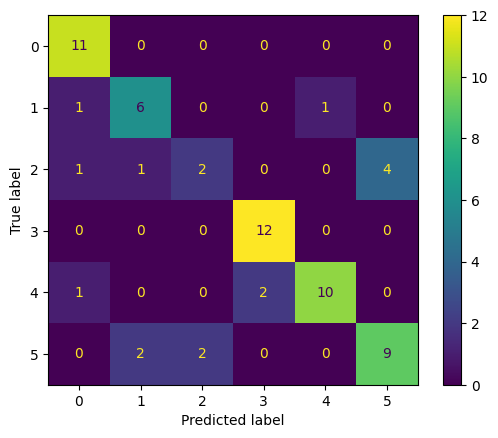

In [349]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=table1)
disp.plot()
plt.show()